In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
%matplotlib inline
import pandas as pd 
import statsmodels.api as sm

## Timing Analysis

We have performed a timed analysis based on the Berea model to estimate the computational scaling for later applications.  
The Pytorch framework was used on an Imperial College based cluster, using a CPU based version of the generation code.

In [2]:
data = pd.read_csv("../../../analysis/timing/berea_K40.csv")
print data.head()
print data.columns

result = sm.OLS(data[data.columns[1]], data[data.columns[0]]**3).fit()
print result.params[0]

   ﻿size    time       std
0     64  0.1644  0.007915
1     80  0.2930  0.006856
2     96  0.4636  0.007813
3    112  0.7034  0.009820
4    128  1.0284  0.008800
Index([u'﻿size', u'time', u'std'], dtype='object')
4.99447747319e-07


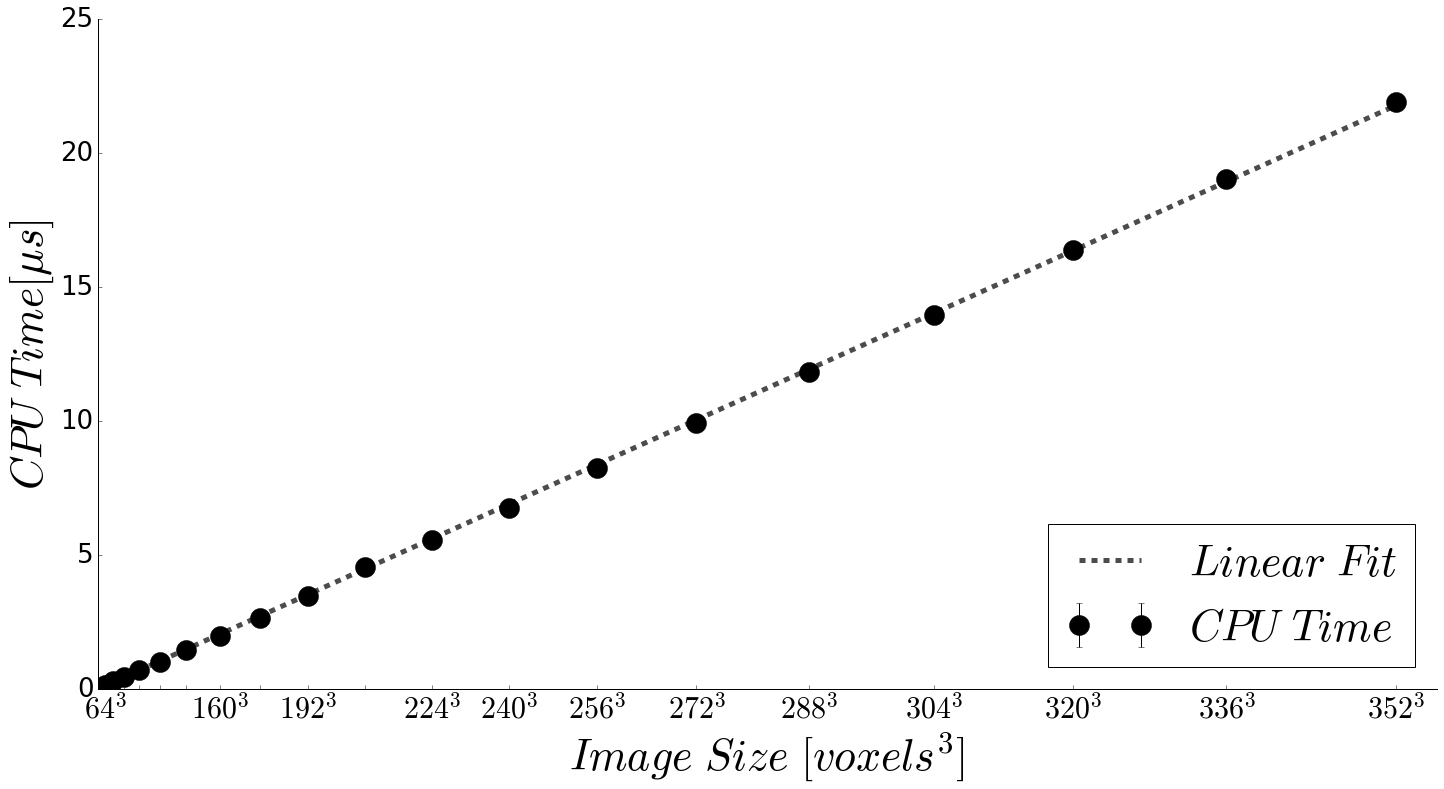

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(24, 12))
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.errorbar(data[data.columns[0]]**3, data[data.columns[1]], fmt='o', color="black", markersize=20, linewidth=1, label=r"$CPU \ Time$", yerr=data[data.columns[2]])
x_space = data[data.columns[0]].values**3
y_trend = result.params[0]*x_space

ax.plot(x_space, y_trend, linestyle="--", linewidth=5, color="black", alpha=0.7, label=r"$Linear \ Fit$")
ax.set_ylabel(r"$CPU \ Time [\mu s]$", fontsize=44)
ax.set_xlabel(r"$Image \ Size \ [voxels^3]$", fontsize=44)
fig.canvas.draw()
labels_y = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(labels_y, fontsize=26)

ax.set_xticks(data[data.columns[0]]**3)
labels_x = [item.get_text() for item in ax.get_xticklabels()]
labels_x = [r"$"+str(val)+r"^3$" for val in data[data.columns[0]]]
labels_x[1] = r""
labels_x[2] = r""
labels_x[3] = r""
labels_x[4] = r""
labels_x[5] = r""
#labels_x[6] = r""
labels_x[7] = r""
labels_x[9] = r""
ax.set_xticklabels(labels_x, fontsize=30)

ax.legend(fontsize=44, loc=4)
fig.savefig("../../../paper/figures/timing_scaling.png", bbox_extra_artists=None, bbox_inches='tight', dpi=72)